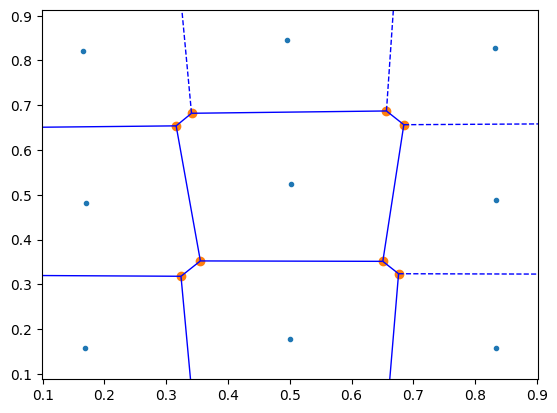

In [4]:
# Python code for creating a CVT
# Vassilis Vassiliades - Inria, Nancy - April 2018
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import gradientUtils as gu

import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.cluster import KMeans
import argparse

# Default values
num_centroids = 9
dimensionality = 2
num_samples = 100000
num_replicates = 1
max_iterations = 100
tolerance = 0.0001
verbose = True


np.random.seed(30)
X = np.random.rand(num_samples,dimensionality)

kmeans = KMeans(
    init='k-means++', 
    n_clusters=num_centroids, 
    n_init=num_replicates, 
    #n_jobs=-1, 
    max_iter=max_iterations, 
    tol=tolerance,
    verbose=0)

kmeans.fit(X)
centroids = kmeans.cluster_centers_
#print (centroids)


#plt.scatter(centroids[:,0], centroids[:,1], s=3)
#plot voronoi of centroids
vor = Voronoi(centroids)
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=True, line_colors='blue')
#plt.xlim(-10,1)
#plt.ylim(-10,1)
# Plot the points
plt.savefig('CVT_'f'{num_centroids}''.png',transparent=True)
plt.show()

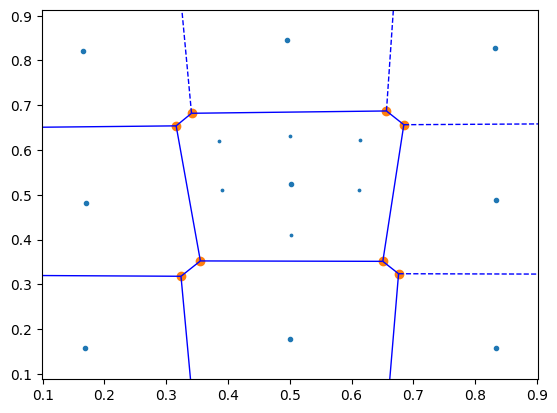

In [5]:
# find verticies of voronoi cell to subdivide
#create triangles from vertices and centroid of voronoi cell
#calculate center of mass of each triangle and create a new centroid
#repeat for each triangle
#remove the original centroid

def subdivide_cell(vor, centro_id_to_split=3):
    #get the vertices of the voronoi cell
    #centro_id_to_split=3
    region = vor.regions[vor.point_region[centro_id_to_split]]
    vertices = np.array([vor.vertices[i] for i in region if i != -1])

    #print('vertices:',vertices)

    #get the centroid of the voronoi cell
    centroid = vor.points[centro_id_to_split]
    #print('centroid:',centroid)
    
    #create triangles from vertices and centroid of voronoi cell
    triangles = np.array([np.array([vertices[i - 1], vertices[i], centroid]) for i in range(len(vertices))])

    #print('triangles:',triangles)

    #calculate center of mass of each triangle and create a new centroid
    #new_centroids = np.array([np.mean(triangles[i], axis=0) * 0.5 + 0.5 * centroid for i in range(len(triangles))])

    new_centroids = np.array([np.mean(triangles[i], axis=0) for i in range(len(triangles))])
    
    #remove the original centroid
    new_centroids = np.append(np.delete(vor.points, centro_id_to_split, 0), new_centroids, axis=0)
    return new_centroids


centro_id_to_split = 3
new_centroids = subdivide_cell(vor, centro_id_to_split)

fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=True, line_colors='blue')
plt.scatter(new_centroids[:,0], new_centroids[:,1], s=3)
plt.savefig('CVT_'f'{num_centroids}''_1.png',transparent=True)



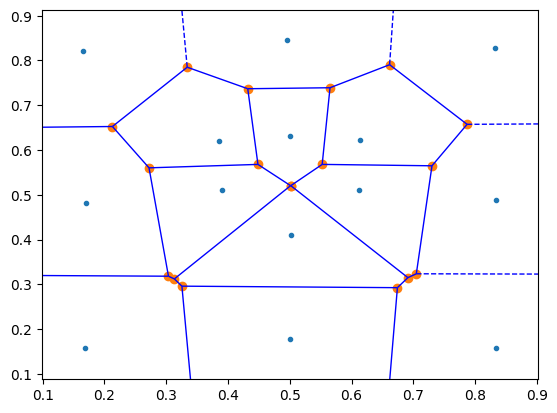

In [6]:
new_centroids = subdivide_cell(vor, centro_id_to_split)
#centroids = np.append(centroids, new_centroids, axis=0)
vor = Voronoi(new_centroids)
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=True, line_colors='blue')
plt.savefig('CVT_'f'{num_centroids}''_2.png',transparent=True)

plt.show()

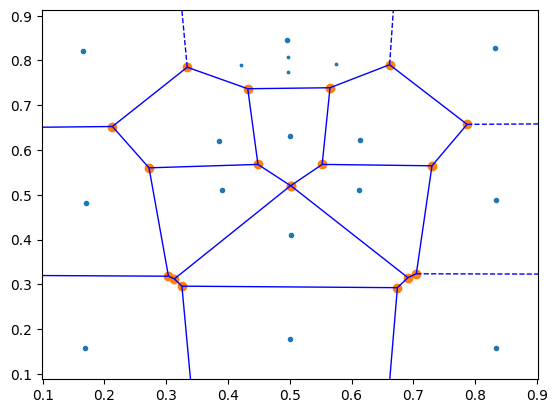

In [7]:
centro_id_to_split = 0
new_centroids = subdivide_cell(vor, centro_id_to_split)
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=True, line_colors='blue')
plt.scatter(new_centroids[:,0], new_centroids[:,1], s=3)
plt.savefig('CVT_'f'{num_centroids}''_3.png',transparent=True)

plt.show()


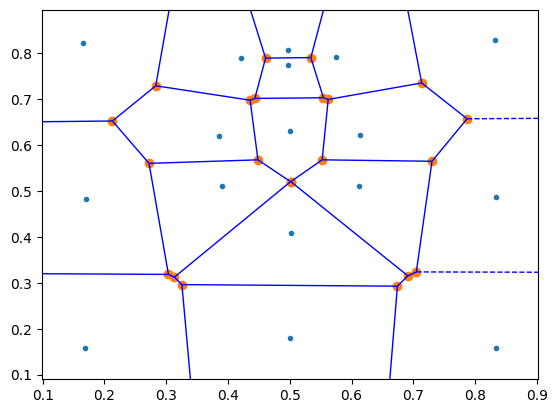

In [8]:

vor = Voronoi(new_centroids)
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=True, line_colors='blue')
plt.savefig('CVT_'f'{num_centroids}''_4.png',transparent=True)

plt.show()

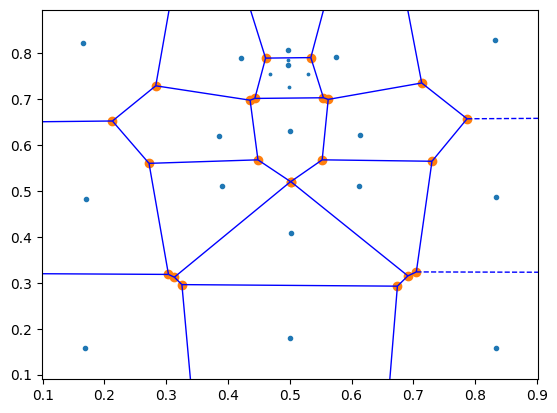

In [9]:
centro_id_to_split = 14

new_centroids = subdivide_cell(vor, centro_id_to_split)
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=True, line_colors='blue')
plt.scatter(new_centroids[:,0], new_centroids[:,1], s=3)
plt.savefig('CVT_'f'{num_centroids}''_5.png',transparent=True)

plt.show()


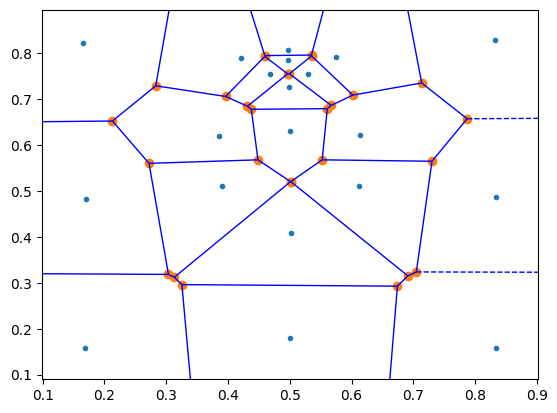

In [10]:

vor = Voronoi(new_centroids)
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=True, line_colors='blue')
plt.savefig('CVT_'f'{num_centroids}''_6.png',transparent=True)

plt.show()

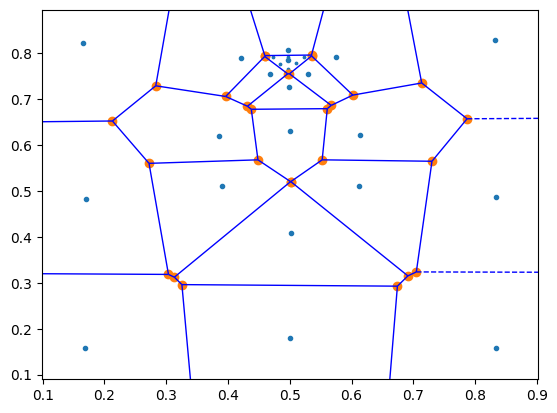

In [11]:

centro_id_to_split = 17

new_centroids = subdivide_cell(vor, centro_id_to_split)
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=True, line_colors='blue')
plt.scatter(new_centroids[:,0], new_centroids[:,1], s=3)
plt.savefig('CVT_'f'{num_centroids}''_7.png',transparent=True)


plt.show()


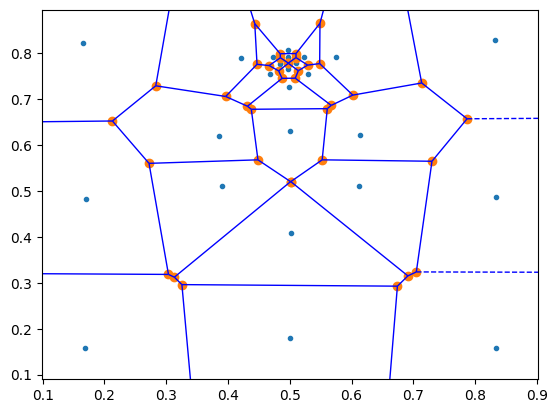

In [12]:

vor = Voronoi(new_centroids)
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=True, line_colors='blue')
plt.savefig('CVT_'f'{num_centroids}''_8.png',transparent=True)

plt.show()